# Simulating a football season using Poisson Distribution

In [818]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import random

In [819]:
table = pd.read_csv('PL2017-18.csv')

In [820]:
# Create a new column called "TotalGoals" that is an addition of "FTHG" and "FTAG" and place it after FTAG column
table.insert(6, 'TotalGoals', table['FTHG'] + table['FTAG'])
table.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,TotalGoals,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,Arsenal,Leicester,4,3,7,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,Brighton,Man City,0,2,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,Chelsea,Burnley,2,3,5,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,Crystal Palace,Huddersfield,0,3,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,Everton,Stoke,1,0,1,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


Text(0.5, 1.0, 'Historgram of the total number of goals scored in 2019-20 season')

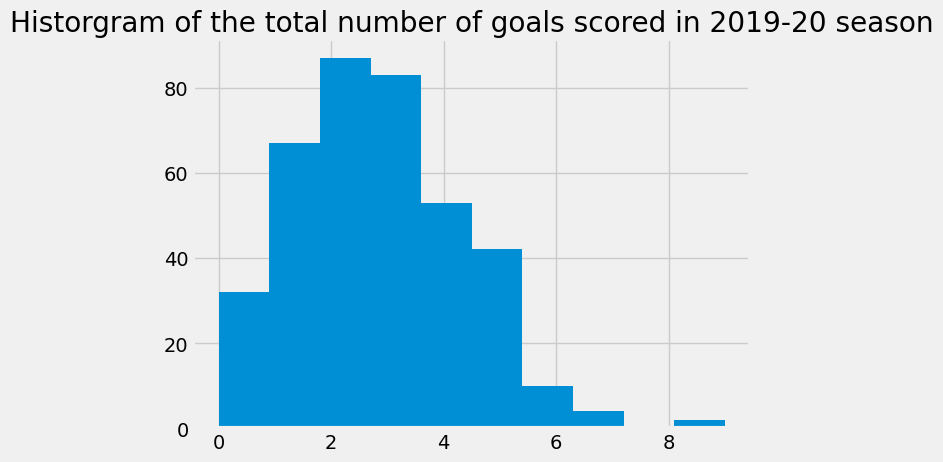

In [821]:
table['TotalGoals'].hist()
plt.title('Historgram of the total number of goals scored in 2019-20 season')

In [822]:
me = table['TotalGoals'].mean()
me

2.6789473684210527

In [823]:
poisson = []
x = []
for i in range(0,10):
    x.append(i)
    poisson.append((math.e**(-me) * me**i)/math.factorial(i))

Text(0.5, 1.0, 'Histogram of a Poisson distribution with mean = mean(goals in 2019-20 season)')

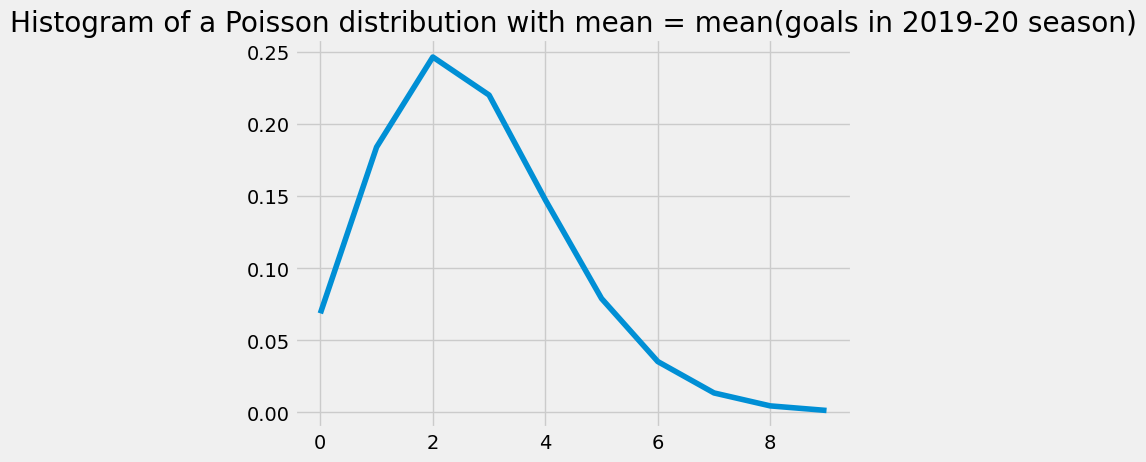

In [824]:
plt.plot(x,poisson)
plt.title('Histogram of a Poisson distribution with mean = mean(goals in 2019-20 season)')

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-1.0, 9.0)

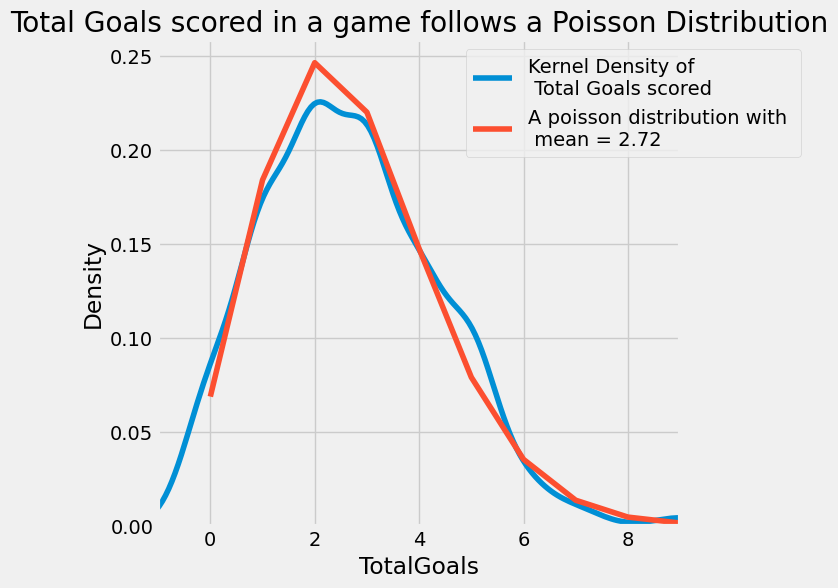

In [825]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
sns.kdeplot(table['TotalGoals'], label = 'Kernel Density of \n Total Goals scored')
plt.plot(x,poisson,label = 'A poisson distribution with \n mean = 2.72')
plt.legend(bbox_to_anchor=(1.25,1))
plt.title('Total Goals scored in a game follows a Poisson Distribution')
plt.xlim(-1, 9)

In [826]:
#Simulating a season

In [827]:
#Formula to simulate a match
#Step 1: Calculate average home goals scored in the season.
#Step 2: Calculate average away goals scored in the season.
#Step 3: For every team who played at home:
#            Calculate home attacking strength = Averge goals scored at home by team / Average goals scored at home overall. (From step 1)
#Step 4: For every team who played away:
#            Calculate away defensive strength = Averge goals conceded away by team / Average goals scored at home overall. (From step 1)
#Step 5: For every team who played at home:
#            Calculate home defensive strength = Averge goals conceded at home by team / Average goals scored away overall. (From step 2)
#Step 6: For every team who played away:
#            Calculate away attacking strength = Averge goals scored away by team / Average goals scored away overall. (From step 2)
#Step 7: Expected home goals scored in a game:
#            Home team attack strength * away team defence strength * average number of home goals
#Step 8: Expected away goals scored in a game:
#            Home team defense strength * away team attack strength * average number of away goals
#Step 9: Instead of using the expected values from Step 7 and Step 8: sample them from a Poisson distribution with lambda parameter = parameters from Step 7 and Step 8.
#        Remember for a Poisson distribution: lambda is the expected value(or mean)
#Step 10: Run these scenarios for several iterations to get simulated results over vast period of time.


In [828]:
#Average goals scored at home = total home goals scored in the season / total number of home games
average_home_hoals = table['FTHG'].mean().round(3)

In [829]:
#Average goals scored away = total away goals scored in the season / total number of away games
average_away_hoals = table['FTAG'].mean().round(3)

In [830]:
#Expected home goals scored in a game:
    #Home team attack strength * away team defence strength * average number of home goals

#home team attacking strength

home_attacking_strength = {}

for team in table['HomeTeam'].unique():
    home_attacking_strength[team] = ((table.loc[table['HomeTeam'] == team]['FTHG'].mean())/average_home_hoals).round(3)
    
    #away team defensive strength
away_defensive_strength = {}
for team in table['AwayTeam'].unique():
    away_defensive_strength[team] = ((table.loc[table['AwayTeam'] == team]['FTHG'].mean())/average_home_hoals).round(3)

In [831]:
#Expected away goals scored in a game:
    #Home team defense strength * away team attack strength * average number of away goals

#home team attacking strength

home_defensive_strength = {}

for team in table['HomeTeam'].unique():
    home_defensive_strength[team] = ((table.loc[table['HomeTeam'] == team]['FTAG'].mean())/average_away_hoals).round(3)
    
    #away team defensive strength
away_attacking_strength = {}
for team in table['AwayTeam'].unique():
    away_attacking_strength[team] = ((table.loc[table['AwayTeam'] == team]['FTAG'].mean())/average_away_hoals).round(3)

In [832]:
# NEW SIGNING IMPACT
# home_attacking_strength['Everton'] = 10

home_attacking_strength

{'Arsenal': 1.855,
 'Brighton': 0.825,
 'Chelsea': 1.031,
 'Crystal Palace': 0.996,
 'Everton': 10,
 'Southampton': 0.687,
 'Watford': 0.928,
 'West Brom': 0.721,
 'Man United': 1.305,
 'Newcastle': 0.721,
 'Bournemouth': 0.893,
 'Burnley': 0.55,
 'Leicester': 0.859,
 'Liverpool': 1.546,
 'Stoke': 0.687,
 'Swansea': 0.584,
 'Huddersfield': 0.55,
 'Tottenham': 1.374,
 'Man City': 2.096,
 'West Ham': 0.825}

In [833]:
# NEW SIGNING IMPACT
# away_defensive_strength['Everton'] = 10

away_defensive_strength

{'Leicester': 1.305,
 'Man City': 0.447,
 'Burnley': 0.756,
 'Huddersfield': 1.134,
 'Stoke': 1.305,
 'Swansea': 1.099,
 'Liverpool': 0.962,
 'Bournemouth': 1.065,
 'West Ham': 1.443,
 'Tottenham': 0.687,
 'Watford': 1.134,
 'West Brom': 0.928,
 'Brighton': 0.996,
 'Crystal Palace': 0.962,
 'Arsenal': 1.065,
 'Man United': 0.653,
 'Newcastle': 1.031,
 'Chelsea': 0.756,
 'Everton': 1.237,
 'Southampton': 1.031}

In [834]:
home_defensive_strength

{'Arsenal': 0.918,
 'Brighton': 1.147,
 'Chelsea': 0.734,
 'Crystal Palace': 1.239,
 'Everton': 1.009,
 'Southampton': 1.193,
 'Watford': 1.422,
 'West Brom': 1.331,
 'Man United': 0.413,
 'Newcastle': 0.78,
 'Bournemouth': 1.377,
 'Burnley': 0.78,
 'Leicester': 1.009,
 'Liverpool': 0.459,
 'Stoke': 1.377,
 'Swansea': 1.101,
 'Huddersfield': 1.147,
 'Tottenham': 0.734,
 'Man City': 0.642,
 'West Ham': 1.193}

In [835]:
# away_attacking_strength['Everton'] = 10

away_attacking_strength

{'Leicester': 1.422,
 'Man City': 2.065,
 'Burnley': 0.918,
 'Huddersfield': 0.551,
 'Stoke': 0.688,
 'Swansea': 0.505,
 'Liverpool': 1.79,
 'Bournemouth': 0.872,
 'West Ham': 1.101,
 'Tottenham': 1.56,
 'Watford': 0.78,
 'West Brom': 0.459,
 'Brighton': 0.459,
 'Crystal Palace': 0.734,
 'Arsenal': 0.918,
 'Man United': 1.377,
 'Newcastle': 0.826,
 'Chelsea': 1.468,
 'Everton': 10,
 'Southampton': 0.78}

In [836]:
all_teams = ['Leicester',
 'Man City',
 'Burnley',
 'Huddersfield',
 'Stoke',
 'Swansea',
 'Liverpool',
 'Bournemouth',
 'West Ham',
 'Tottenham',
 'Watford',
 'West Brom',
 'Brighton',
 'Crystal Palace',
 'Arsenal',
 'Man United',
 'Newcastle',
 'Chelsea',
 'Everton',
 'Southampton'
 ]

# Simulating a single season

In [837]:
all_season_tables = []
all_matches = []

wins = {}
draws = {}
losses = {}
points = {}
GF = {}
GA = {}
final_points_table = None
for team in all_teams:
    wins[team] = 0
    draws[team] = 0
    losses[team] = 0
    points[team] = 0
    GF[team] = 0
    GA[team] = 0
for i in range(0,len(all_teams)):
    for j in range(0,len(all_teams)):
        if i!=j:
            ht = all_teams[i]
            at = all_teams[j]
            #Calculating home team goals:
            #Home team attack strength * away team defence strength * average number of home goals
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * average_home_hoals
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            #Calculating home team goals:
            #Home team defense strength * away team attack strength * average number of away goals
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * average_away_hoals
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':all_teams[i],
                     'Away_Team':all_teams[j],
                     'Home_Goals':ht_g,
                     'Away_Goals':at_g}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
final_points_table['GamesPlayed'] = 38
final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
final_points_table['Position'] = range(1,21)            

In [838]:
final_points_table

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position
0,Everton,38,38,0,0,114,527,70,457,1
1,Liverpool,38,27,5,6,86,77,48,29,2
2,Man City,38,26,7,5,85,121,41,80,3
3,Chelsea,38,23,6,9,75,75,58,17,4
4,Tottenham,38,20,10,8,70,86,63,23,5
5,Man United,38,19,9,10,66,67,46,21,6
6,Arsenal,38,16,8,14,56,81,86,-5,7
7,Burnley,38,16,8,14,56,51,57,-6,8
8,Crystal Palace,38,14,8,16,50,40,69,-29,9
9,Leicester,38,13,7,18,46,55,105,-50,10


In [839]:
single_season_all_results = pd.DataFrame(all_matches)
single_season_all_results['Total_Goals'] = single_season_all_results['Home_Goals'] + single_season_all_results['Away_Goals']

In [840]:
poisson_single = []
x_single = []
for i in range(0,10):
    x_single.append(i)
    poisson_single.append((math.e**(-single_season_all_results['Total_Goals'].mean()) * single_season_all_results['Total_Goals'].mean()**i)/math.factorial(i))

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-1.0, 9.0)

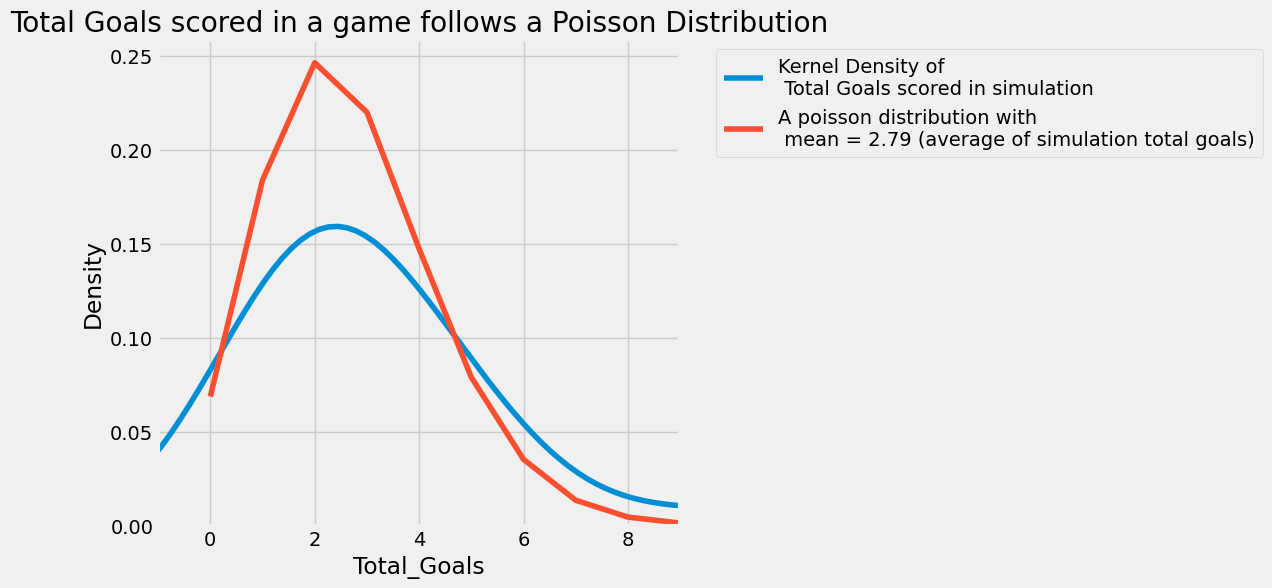

In [841]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
sns.kdeplot(single_season_all_results['Total_Goals'], label = 'Kernel Density of \n Total Goals scored in simulation')
plt.plot(x,poisson,label = 'A poisson distribution with \n mean = 2.79 (average of simulation total goals)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('Total Goals scored in a game follows a Poisson Distribution')
plt.xlim(-1, 9)

# Simulating a 100 seasons

In [842]:
all_season_tables = []
all_matches = []
introduce_randomness = True
for season in range(1,10001):
    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None
    for team in all_teams:
        wins[team] = 0
        draws[team] = 0
        losses[team] = 0
        points[team] = 0
        GF[team] = 0
        GA[team] = 0
    for i in range(0,len(all_teams)):
        for j in range(0,len(all_teams)):
            if i!=j:
                ht = all_teams[i]
                at = all_teams[j]

                #Calculating home team goals:
                #Home team attack strength * away team defence strength * average number of home goals
                effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * average_home_hoals
                effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
                ht_g = np.random.poisson(effective_home_lambda)
                ht_g = round(ht_g)

                #Calculating home team goals:
                #Home team defense strength * away team attack strength * average number of away goals
                effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * average_away_hoals
                effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
                at_g = np.random.poisson(effective_away_lambda)
                at_g = round(at_g)


                match = {'Home_Team':all_teams[i],
                         'Away_Team':all_teams[j],
                        'Home_Goals':ht_g,
                        'Away_Goals':at_g,
                        'Season':season}
                all_matches.append(match)

                GF[ht] += ht_g
                GF[at] += at_g
                GA[ht] += at_g
                GA[at] += ht_g

                #Assigning Points:
                if ht_g > at_g:
                    wins[ht] +=1
                    losses[at] +=1
                    points[ht] +=3
                elif ht_g < at_g:
                    wins[at] +=1
                    losses[ht] +=1
                    points[at] +=3
                if ht_g == at_g:
                    draws[ht] +=1
                    draws[at] +=1
                    points[ht] +=1
                    points[at] +=1
            else:
                continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 38
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team',
                                             'GamesPlayed', 
                                             'Wins', 
                                             'Draws', 
                                             'Losses', 
                                             'Points', 
                                             'GF', 
                                             'GA',
                                             'GD']].sort_values(['Points','GD', 'GF', 'GA'], 
                                                                ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,21)
    final_points_table['Season'] = season
    
    all_season_tables.append(final_points_table)   

all_season_tables = pd.concat(all_season_tables)

all_season_tables.head(20)

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position,Season
0,Everton,38,38,0,0,114,541,88,453,1,1
1,Tottenham,38,23,9,6,78,100,70,30,2,1
2,Man City,38,24,5,9,77,128,75,53,3,1
3,Liverpool,38,24,5,9,77,101,67,34,4,1
4,Man United,38,21,8,9,71,98,71,27,5,1
5,Arsenal,38,21,7,10,70,109,93,16,6,1
6,Chelsea,38,21,5,12,68,86,81,5,7,1
7,Crystal Palace,38,13,13,12,52,78,89,-11,8,1
8,Leicester,38,16,3,19,51,76,113,-37,9,1
9,Newcastle,38,14,6,18,48,57,90,-33,10,1


In [843]:
all_matches_table = pd.DataFrame(all_matches)
all_matches_table = all_matches_table[['Season','Home_Team','Away_Team','Home_Goals','Away_Goals']]
all_matches_table['Total_Goals'] = all_matches_table['Home_Goals'] + all_matches_table['Away_Goals']
all_matches_table.sort_values('Total_Goals', ascending  = False).head(20)

,Season,Home_Team,Away_Team,Home_Goals,Away_Goals,Total_Goals
2562690,6744,Everton,West Ham,42,3,45
1780642,4686,Everton,Leicester,38,5,43
2789546,7341,Everton,Stoke,36,7,43
2129486,5604,Everton,Stoke,38,5,43
1759750,4631,Everton,West Ham,41,1,42
3428330,9022,Everton,West Ham,39,2,41
2356722,6202,Everton,Leicester,36,5,41
3671530,9662,Everton,West Ham,40,1,41
2974602,7828,Everton,Leicester,35,6,41
107122,282,Everton,Leicester,35,6,41


<Axes: >

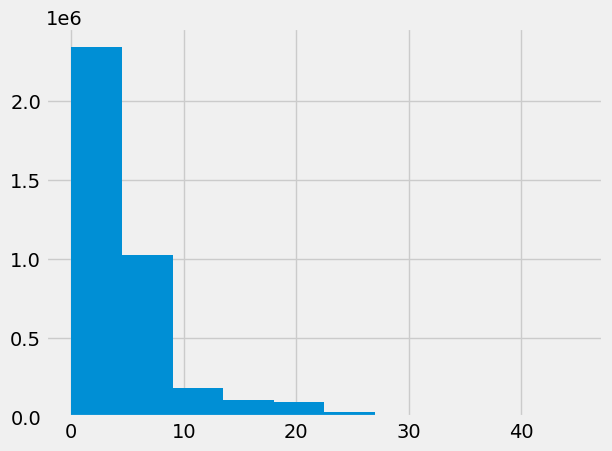

In [844]:
all_matches_table['Total_Goals'].hist()